# <center>Data Science Project</center>
                                                                           
   # <center>Naive Baye's</center>               

 # <center>By Seema Singh Saharan</center>

# Data Science Project Steps

1. Define the Research problem and questions
2. Analyze data by descriptive statistics and graphical visualization.
3. Prepare data by using relevant preprocessing transformations, data cleaning, 
    data standardization,deaing with null and outlier values.
4. Divide data into testing and training set.
5. Evaluate the first algorithm and its model performance.Create a confusion Matrix.
6. Improve model by cross validation or feature selection
7. Evaluate variety of algorithms by creating test harness for diverse
    algorithms in conjuction with resampling techniques like cross validation 
    bootstrapping.
9. Choose the best model and present the results. 

## 1. Define the Research problem and questions

**Research Questions:**  

    1.Predict Risk using Gender and Chest Pain Type?


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

## 2. Analyze data by descriptive statistics and graphical visualization.

In [2]:
heartattackData = pd.read_csv('gender_submission.csv')
print(heartattackData.shape)
print(heartattackData.head())
print(heartattackData.describe())
types = heartattackData.dtypes
print(types)
heartattackData.describe()


(270, 14)
   Age  Sex  Chest_Pain_Type   BP  Cholesterol  Fasting_Blood_MoreThan_120  \
0   70    1                4  130          322                           0   
1   67    0                3  115          564                           0   
2   57    1                2  124          261                           0   
3   64    1                4  128          263                           0   
4   74    0                2  120          269                           0   

   Resting_Electrocardiographic_Reading  Maximum_Heart_Rate   \
0                                     2                  109   
1                                     2                  160   
2                                     0                  141   
3                                     0                  105   
4                                     2                  121   

   Exercise_Induced_Angina  Old_Peak  Slope  Number_Blood_Vessels_Calcified  \
0                        0       2.4      2              

,Age,Sex,Chest_Pain_Type,BP,Cholesterol,Fasting_Blood_MoreThan_120,Resting_Electrocardiographic_Reading,Maximum_Heart_Rate,Exercise_Induced_Angina,Old_Peak,Slope,Number_Blood_Vessels_Calcified,thal,Risk
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [ ]:
# gender_submission (1).csv

## 3. Prepare data by using relevant preprocessing transformations, data cleaning, data standardization,deaing with null and outlier values.
## 4. Divide data into testing and training set.
## 5. Evaluate the first algorithm and its model performance. Create a confusion Matrix.


In [3]:
# Divide data into predictor features vector and the label of the trget variable 'Risk'

X = heartattackData[['Sex','Chest_Pain_Type']] 
y = heartattackData[['Risk']]

print(X)
print(y)

# Dividing data into two subsets training and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization  

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Initiating the scikit learn instance and fit is used to train the model.The predict() function 
# implements prediction.It takes test data as an argument and returns predicted labels.

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
# training label from a row vector to column by ravel()
classifier.fit(X_train, np.ravel(y_train))
y_pred = classifier.predict(X_test)
print(y_pred)

# Step 6: we can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)



     Sex  Chest_Pain_Type
0      1                4
1      0                3
2      1                2
3      1                4
4      0                2
..   ...              ...
265    1                3
266    1                2
267    0                2
268    1                4
269    1                4

[270 rows x 2 columns]
     Risk
0       2
1       1
2       2
3       1
4       1
..    ...
265     1
266     1
267     1
268     1
269     2

[270 rows x 1 columns]
[2 2 1 1 2 1 1 2 2 2 2 1 2 2 1 2 1 1 1 2 1 2 2 2 2 1 1 2 1 2 1 2 2 2 2 1 1
 1 2 1 1 1 1 2 1 2 2 1 1 2 1 1 2 2]
              precision    recall  f1-score   support

           1       0.73      0.68      0.70        28
           2       0.68      0.73      0.70        26

    accuracy                           0.70        54
   macro avg       0.70      0.70      0.70        54
weighted avg       0.71      0.70      0.70        54

70.37037037037037


## 6. Improve model by cross validation or feature selection

In [4]:


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold = KFold(n_splits=10,random_state=7, shuffle=True)
model = GaussianNB()
results = cross_val_score(model, y_test, y_pred, cv=fold)
print(results.mean())

0.6966666666666665


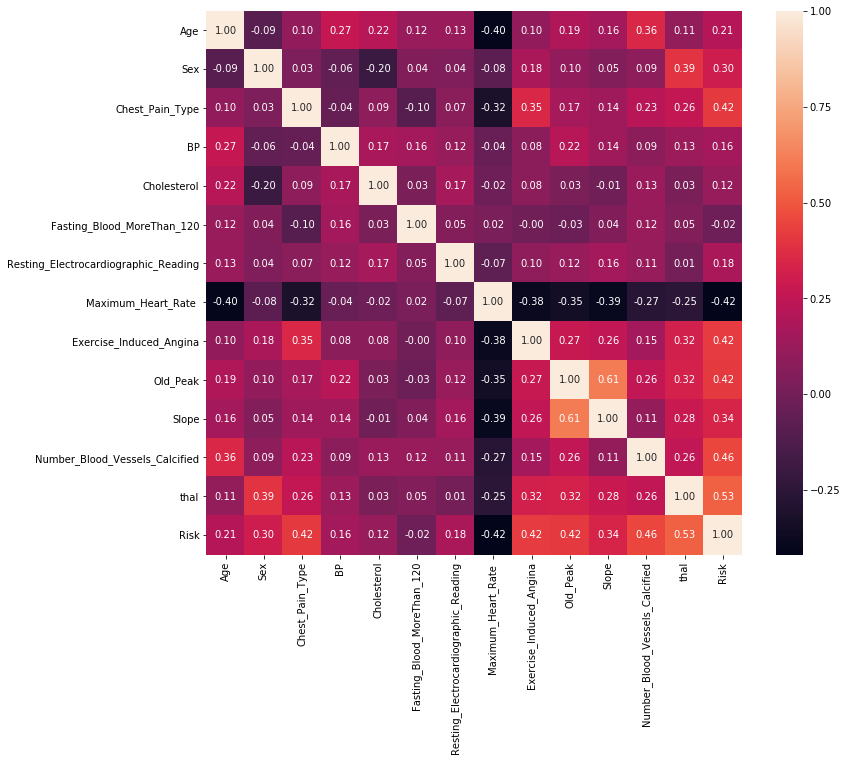

In [5]:
# Viewing Correlation coefficients using a heatmap
heartattackData = pd.read_csv('HeartAttack.csv')
plt.figure(figsize=(12,10))
sns.heatmap(heartattackData.corr(),annot=True,fmt='.2f')

In [6]:
# Divide entire data into predictor features vector and the label of the target variable 'Risk'
X = heartattackData.drop('Risk', axis = 1)
y = heartattackData[['Risk']]

print(X)
print(y)

# Dividing data into two subsets training and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization  

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Initiating the scikit learn instance and fit is used to train the model.The predict() function 
# implements prediction.It takes test data as an argument and returns predicted labels.

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
# training label from a row vector to column by ravel()
classifier.fit(X_train, np.ravel(y_train))
y_pred = classifier.predict(X_test)
print(y_pred)

# Step 6: we can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)



     Age  Sex  Chest_Pain_Type   BP  Cholesterol  Fasting_Blood_MoreThan_120  \
0     70    1                4  130          322                           0   
1     67    0                3  115          564                           0   
2     57    1                2  124          261                           0   
3     64    1                4  128          263                           0   
4     74    0                2  120          269                           0   
..   ...  ...              ...  ...          ...                         ...   
265   52    1                3  172          199                           1   
266   44    1                2  120          263                           0   
267   56    0                2  140          294                           0   
268   57    1                4  140          192                           0   
269   67    1                4  160          286                           0   

     Resting_Electrocardiographic_Readi

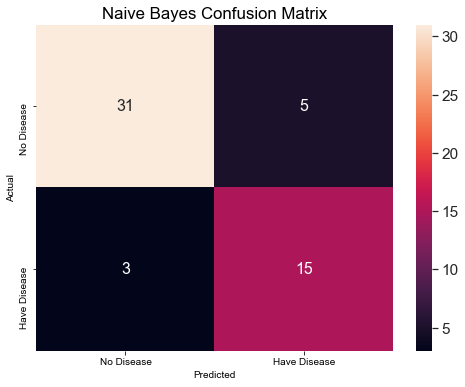

In [7]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},xticklabels=["No Disease", "Have Disease"], yticklabels=["No Disease", "Have Disease"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

In [8]:
# feature selection

#univariate selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = heartattackData.iloc[:,0:13]  #independent columns
y = heartattackData.iloc[:,-1]    #target column 

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features

                                   Specs       Score
7                    Maximum_Heart_Rate   168.929831
11        Number_Blood_Vessels_Calcified   74.122652
12                                  thal   59.463091
9                               Old_Peak   58.697286
4                            Cholesterol   40.093093
8                Exercise_Induced_Angina   31.822472
0                                    Age   18.485273
3                                     BP   15.775632
2                        Chest_Pain_Type   13.330455
6   Resting_Electrocardiographic_Reading    8.688587
1                                    Sex    7.711475
10                                 Slope    7.301402


[0.0648351  0.04222703 0.08891099 0.05822722 0.08336649 0.01987194
 0.03701952 0.07722862 0.09453757 0.06392113 0.0916198  0.1336751
 0.1445595 ]

C:\Users\Seema Singh Saharan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


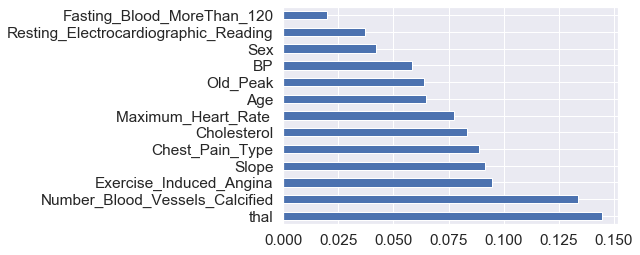

In [9]:
# feature importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [10]:
## Gather columns
# Divide data into predictor features vector and the label of the target variable 'Risk'
X = heartattackData[['thal','Number_Blood_Vessels_Calcified','Chest_Pain_Type','Exercise_Induced_Angina','Old_Peak','Age']] 
y = heartattackData[['Risk']]

print(X)
print(y)

# Dividing data into two subsets training and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization  

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Initiating the scikit learn instance and fit is used to train the model.The predict() function 
# implements prediction.It takes test data as an argument and returns predicted labels.

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
# training label from a row vector to column by ravel()
classifier.fit(X_train, np.ravel(y_train))
y_pred = classifier.predict(X_test)
print(y_pred)

# Step 6: we can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)



     thal  Number_Blood_Vessels_Calcified  Chest_Pain_Type  \
0       3                               3                4   
1       7                               0                3   
2       7                               0                2   
3       7                               1                4   
4       3                               1                2   
..    ...                             ...              ...   
265     7                               0                3   
266     7                               0                2   
267     3                               0                2   
268     6                               0                4   
269     3                               3                4   

     Exercise_Induced_Angina  Old_Peak  Age  
0                          0       2.4   70  
1                          0       1.6   67  
2                          0       0.3   57  
3                          1       0.2   64  
4                        

83.33333333333334


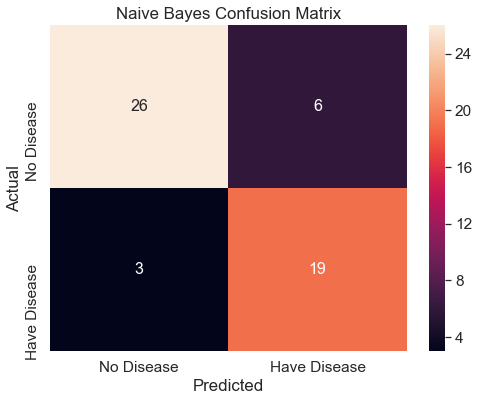

In [11]:
#model performance - accuracy
accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},xticklabels=["No Disease", "Have Disease"], yticklabels=["No Disease", "Have Disease"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

## 7. Applying a new Algorithm

In [12]:

from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state = 0)
logistic_regression.fit(X_train, np.ravel(y_train))

print('Accuracy of logistic regression on training set: {:.2f}'.format(logistic_regression.score(X_train, y_train)))
print('Accuracy of logistic regression on test set: {:.2f}'.format(logistic_regression.score(X_test, y_test)))


Accuracy of logistic regression on training set: 0.85
Accuracy of logistic regression on test set: 0.80


C:\Users\Seema Singh Saharan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


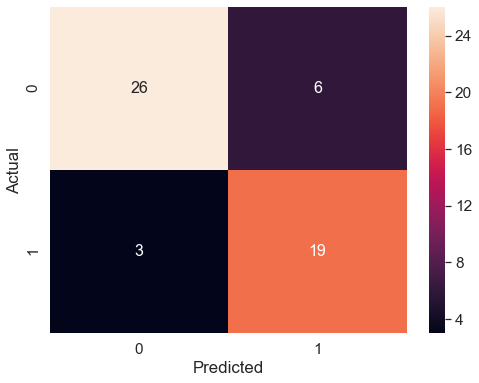

In [13]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()